<a href="https://colab.research.google.com/github/Malleshcr7/AI-ML-Projects/blob/main/Datasetcreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Comprehensive Data Cleaning Project: All Types with Massive Dataset
Project Overview
This notebook demonstrates all major data cleaning types using a large synthetic messy dataset (1000+ rows). Every cleaning technique is implemented step-by-step with text explanations and executable code cells for Google Colab.

##Data cleaning is critical for accurate analysis and machine learning. This project covers:

Missing data handling (deletion, imputation)

Structural error correction (typos, types, formatting)

Outlier management (detection, capping, transformation)

Standardization and normalization

Inaccuracy fixes (validation, logical checks)

Duplicate removal (exact and fuzzy)

Data transformation and enrichment (encoding, binning, feature engineering)

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


##Creating a synthetic dataset with 1000 records containing all types of data quality issues

In [88]:
np.random.seed(42)
n_rows = 1000

# Generate base data with intentional messiness
data = {
    'CustomerID': list(range(1, n_rows + 1)),
    'Name': [],
    'Email': [],
    'Age': [],
    'Income': [],
    'City': [],
    'Country': [],
    'SignupDate': [],
    'LastPurchase': [],
    'ProductCategory': [],
    'SpendAmount': [],
    'AccountStatus': [],
    'PhoneNumber': []
}

# Names with inconsistent formatting
first_names = ['John', 'jane', 'ALICE', 'Bob ', ' Charlie', 'eve', 'David', 'Emma']
last_names = ['Smith', 'DOE', 'johnson', ' Brown', 'Davis ', 'WILSON', 'moore']

for i in range(n_rows):
    # Names with spacing and case issues
    data['Name'].append(f"{np.random.choice(first_names)} {np.random.choice(last_names)}")

    # Emails with inconsistencies
    if i % 10 == 0:
        data['Email'].append(None)  # Missing emails
    elif i % 15 == 0:
        data['Email'].append('invalid_email')  # Invalid format
    else:
        data['Email'].append(f"user{i}@{'GMAIL' if i % 2 else 'yahoo'}.com")

    # Age with outliers and missing values
    if i % 20 == 0:
        data['Age'].append(None)
    elif i % 30 == 0:
        data['Age'].append(np.random.choice([150, 200, -5, 0]))  # Outliers
    else:
        data['Age'].append(np.random.randint(18, 70))

    # Income with outliers and wrong types
    if i % 25 == 0:
        data['Income'].append(None)
    elif i % 35 == 0:
        data['Income'].append('fifty thousand')  # Text instead of number
    elif i % 40 == 0:
        data['Income'].append(-50000)  # Negative value
    else:
        data['Income'].append(np.random.randint(20000, 200000))

    # City with typos and inconsistent naming
    cities = ['New York', 'NY', 'new york', 'Los Angeles', 'LA', 'la',
              'Chicago', 'CHICAGO', 'Houston', 'houston']
    data['City'].append(np.random.choice(cities) if i % 15 != 0 else None)

    # Country with inconsistencies
    countries = ['USA', 'usa', 'United States', 'US', 'India', 'INDIA',
                 'UK', 'United Kingdom', 'Canada', 'CANADA']
    data['Country'].append(np.random.choice(countries))

    # Dates with format issues
    if i % 18 == 0:
        data['SignupDate'].append('not a date')
    elif i % 22 == 0:
        data['SignupDate'].append(None)
    else:
        date = datetime(2020, 1, 1) + timedelta(days=np.random.randint(0, 1500))
        formats = ['%Y-%m-%d', '%m/%d/%Y', '%d-%m-%Y']
        data['SignupDate'].append(date.strftime(np.random.choice(formats)))

    # Last purchase date (some after signup - logical error)
    if i % 20 == 0:
        data['LastPurchase'].append(None)
    else:
        date = datetime(2019, 1, 1) + timedelta(days=np.random.randint(0, 2000))
        data['LastPurchase'].append(date.strftime('%Y-%m-%d'))

    # Product categories with typos
    categories = ['Electronics', 'electronics', 'ELECTRONICS', 'Clothing',
                  'clothing', 'Books', 'books', 'Home & Garden', 'home']
    data['ProductCategory'].append(np.random.choice(categories) if i % 12 != 0 else None)

    # Spend amount with outliers
    if i % 28 == 0:
        data['SpendAmount'].append(None)
    elif i % 45 == 0:
        data['SpendAmount'].append(np.random.choice([1000000, -500]))
    else:
        data['SpendAmount'].append(round(np.random.uniform(10, 5000), 2))

    # Account status inconsistent
    statuses = ['Active', 'active', 'ACTIVE', 'Inactive', 'inactive',
                'Suspended', 'suspended', 'Y', 'N', 'Yes', 'No']
    data['AccountStatus'].append(np.random.choice(statuses) if i % 17 != 0 else None)

    # Phone numbers with format issues
    if i % 16 == 0:
        data['PhoneNumber'].append(None)
    elif i % 23 == 0:
        data['PhoneNumber'].append('123')  # Invalid
    else:
        formats = [f"+1-{np.random.randint(200,999)}-{np.random.randint(100,999)}-{np.random.randint(1000,9999)}",
                   f"{np.random.randint(2000000000,9999999999)}",
                   f"({np.random.randint(200,999)}) {np.random.randint(100,999)}-{np.random.randint(1000,9999)}"]
        data['PhoneNumber'].append(np.random.choice(formats))

# Add duplicates
for i in range(50):
    idx = np.random.randint(0, n_rows)
    for key in data.keys():
        if key != 'CustomerID':
            data[key].append(data[key][idx])
        else:
            data[key].append(data[key][idx])  # Duplicate ID

df_raw = pd.DataFrame(data)
print(f"Dataset shape: {df_raw.shape}")
df_raw.head(10)


Dataset shape: (1050, 13)


,CustomerID,Name,Email,Age,Income,City,Country,SignupDate,LastPurchase,ProductCategory,SpendAmount,AccountStatus,PhoneNumber
0,1,David Brown,None,NaN,None,None,United Kingdom,not a date,None,None,NaN,None,None
1,2,Charlie Davis,user1@GMAIL.com,56.0,157337,new york,UK,26-11-2020,2019-03-29,clothing,3009.56,Y,+1-330-761-1769
2,3,John Brown,user2@yahoo.com,39.0,150608,houston,United States,2023-06-21,2022-02-28,clothing,3041.65,inactive,+1-366-373-9792
3,4,jane Brown,user3@GMAIL.com,45.0,140174,Chicago,United Kingdom,02/04/2020,2022-01-09,Clothing,919.36,Inactive,6429456860
4,5,jane WILSON,user4@yahoo.com,53.0,183678,CHICAGO,UK,2023-06-29,2023-09-22,Home & Garden,4224.22,active,(692) 140-6276
5,6,Charlie Smith,user5@GMAIL.com,42.0,60774,Houston,United Kingdom,26-02-2023,2022-03-08,ELECTRONICS,3537.22,ACTIVE,+1-618-388-6892
6,7,Emma Brown,user6@yahoo.com,51.0,72256,Chicago,UK,15-03-2022,2020-11-14,Home & Garden,1380.86,ACTIVE,(968) 104-8385
7,8,David WILSON,user7@GMAIL.com,56.0,141626,Houston,CANADA,2022-06-10,2023-09-11,books,2382.10,Inactive,+1-933-584-8574
8,9,Emma moore,user8@yahoo.com,68.0,137845,NY,CANADA,07/10/2021,2024-05-30,clothing,4358.59,Inactive,+1-997-430-2663
9,10,John johnson,user9@GMAIL.com,69.0,147948,Houston,United States,10/14/2023,2023-01-19,home,2429.30,Active,+1-433-783-1663


##Examine the raw dataset to understand its structure, data types, and initial quality issues.



In [89]:
print("Dataset Info:")
print(df_raw.info())
print("\n" + "="*50 + "\n")
print("First 10 rows:")
print(df_raw.head(10))
print("\n" + "="*50 + "\n")
print("Missing values per column:")
print(df_raw.isnull().sum())
print("\n" + "="*50 + "\n")
print("Basic statistics:")
print(df_raw.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1050 non-null   int64  
 1   Name             1050 non-null   object 
 2   Email            941 non-null    object 
 3   Age              995 non-null    float64
 4   Income           1007 non-null   object 
 5   City             980 non-null    object 
 6   Country          1050 non-null   object 
 7   SignupDate       1007 non-null   object 
 8   LastPurchase     995 non-null    object 
 9   ProductCategory  964 non-null    object 
 10  SpendAmount      1011 non-null   float64
 11  AccountStatus    990 non-null    object 
 12  PhoneNumber      985 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 106.8+ KB
None


First 10 rows:
   CustomerID             Name            Email   Age  Income      City  \
0           1     David  Br

##Visualize Missing Data
Create a heatmap to visualize the pattern of missing values across the dataset.

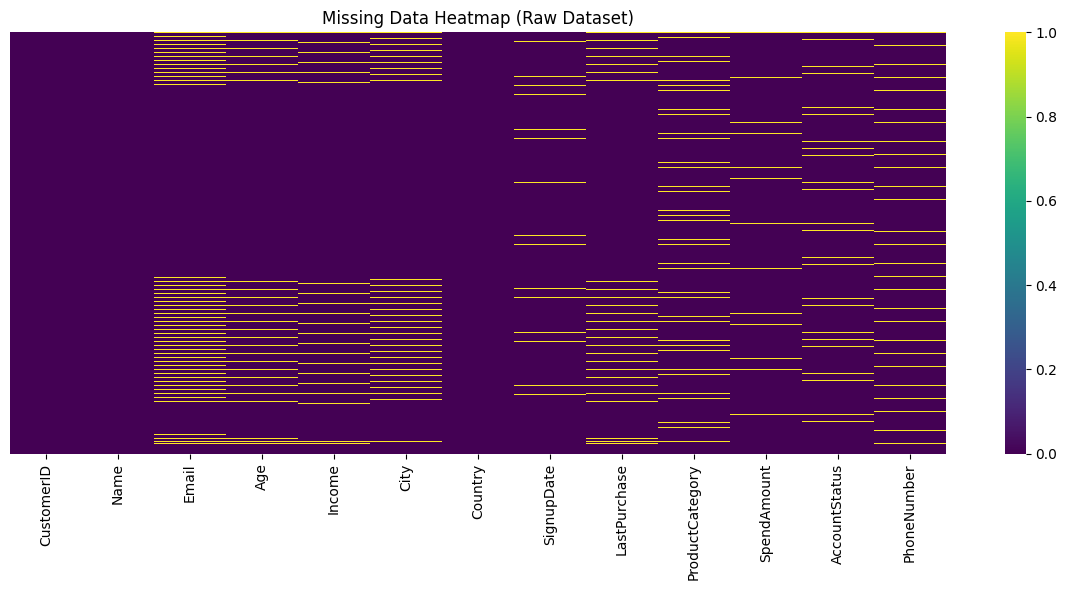

Missing data percentage by column:
Email              10.380952
ProductCategory     8.190476
City                6.666667
PhoneNumber         6.190476
AccountStatus       5.714286
Age                 5.238095
LastPurchase        5.238095
Income              4.095238
SignupDate          4.095238
SpendAmount         3.714286
dtype: float64


In [90]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_raw.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap (Raw Dataset)')
plt.tight_layout()
plt.show()

# Missing data percentage
missing_pct = (df_raw.isnull().sum() / len(df_raw)) * 100
print("Missing data percentage by column:")
print(missing_pct[missing_pct > 0].sort_values(ascending=False))


  ## HANDLING MISSING DATA

  ## Missing Data Strategy
We'll use multiple approaches:

Deletion for rows with critical missing values

Statistical imputation (mean, median, mode)

Forward/backward fill for time series

Constant value imputation

In [91]:
df = df_raw.copy()
print(f"Starting with {len(df)} rows")


Starting with 1050 rows


Listwise Deletion for Critical Missing

In [92]:
# Remove rows where CustomerID is missing (critical field)
initial_count = len(df)
df = df[df['CustomerID'].notna()]
print(f"Removed {initial_count - len(df)} rows with missing CustomerID")


Removed 0 rows with missing CustomerID


Column Deletion Assessment

In [93]:
# Check if any column has > 50% missing (would consider deletion)
high_missing = (df.isnull().sum() / len(df)) > 0.5
print("Columns with >50% missing data:")
print(high_missing[high_missing == True])



Columns with >50% missing data:
Series([], dtype: bool)


Statistical Imputation - Numerical Columns

In [94]:
# Age: Impute with median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
print(f"Filled Age missing values with median: {age_median}")

# Income: Impute with mean (after cleaning)
# Will handle this after fixing data types

# SpendAmount: Impute with median
spend_median = df['SpendAmount'].median()
df['SpendAmount'].fillna(spend_median, inplace=True)
print(f"Filled SpendAmount missing values with median: {spend_median}")


Filled Age missing values with median: 43.0
Filled SpendAmount missing values with median: 2441.19


 Mode Imputation - Categorical Columns


In [95]:
# City: Impute with mode
city_mode = df['City'].mode()[0] if len(df['City'].mode()) > 0 else 'Unknown'
df['City'].fillna(city_mode, inplace=True)

# ProductCategory: Impute with mode
category_mode = df['ProductCategory'].mode()[0] if len(df['ProductCategory'].mode()) > 0 else 'Unknown'
df['ProductCategory'].fillna(category_mode, inplace=True)

# AccountStatus: Impute with mode
status_mode = df['AccountStatus'].mode()[0] if len(df['AccountStatus'].mode()) > 0 else 'Unknown'
df['AccountStatus'].fillna(status_mode, inplace=True)

print("Filled categorical columns with mode values")


Filled categorical columns with mode values


Constant Value Imputation

In [96]:
# Email: Fill with placeholder
df['Email'].fillna('unknown@email.com', inplace=True)

# PhoneNumber: Fill with placeholder
df['PhoneNumber'].fillna('000-000-0000', inplace=True)

print("Filled Email and PhoneNumber with constant placeholders")


Filled Email and PhoneNumber with constant placeholders


Check Remaining Missing Values


In [97]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
CustomerID          0
Name                0
Email               0
Age                 0
Income             43
City                0
Country             0
SignupDate         43
LastPurchase       55
ProductCategory     0
SpendAmount         0
AccountStatus       0
PhoneNumber         0
dtype: int64


##CORRECTING STRUCTURAL ERRORS
##Fix Typos and Inconsistent Capitalization
Standardize text fields to ensure consistency across the dataset.

In [98]:
# Strip whitespace and title case
df['Name'] = df['Name'].str.strip().str.title()
print("Sample cleaned names:")
print(df['Name'].head(10))


Sample cleaned names:
0     David  Brown
1    Charlie Davis
2      John  Brown
3      Jane  Brown
4      Jane Wilson
5    Charlie Smith
6      Emma  Brown
7     David Wilson
8       Emma Moore
9     John Johnson
Name: Name, dtype: object


Standardize City Names

In [99]:
# Create mapping for city standardization
city_mapping = {
    'new york': 'New York',
    'ny': 'New York',
    'los angeles': 'Los Angeles',
    'la': 'Los Angeles',
    'chicago': 'Chicago',
    'houston': 'Houston'
}

df['City'] = df['City'].str.strip().str.lower()
df['City'] = df['City'].replace(city_mapping)
df['City'] = df['City'].str.title()

print("Unique cities after standardization:")
print(df['City'].unique())


Unique cities after standardization:
['Chicago' 'New York' 'Houston' 'Los Angeles']


Standardize Country Names

In [100]:
# Create mapping for country standardization
country_mapping = {
    'usa': 'USA',
    'united states': 'USA',
    'us': 'USA',
    'india': 'India',
    'uk': 'UK',
    'united kingdom': 'UK',
    'canada': 'Canada'
}

df['Country'] = df['Country'].str.strip().str.lower()
df['Country'] = df['Country'].replace(country_mapping)

print("Unique countries after standardization:")
print(df['Country'].unique())


Unique countries after standardization:
['UK' 'USA' 'Canada' 'India']


 Standardize Product Categories

In [101]:
df['ProductCategory'] = df['ProductCategory'].str.strip().str.lower()
category_mapping = {
    'electronics': 'Electronics',
    'clothing': 'Clothing',
    'books': 'Books',
    'home': 'Home & Garden',
    'home & garden': 'Home & Garden'
}

df['ProductCategory'] = df['ProductCategory'].replace(category_mapping)

print("Unique product categories after standardization:")
print(df['ProductCategory'].unique())


Unique product categories after standardization:
['Clothing' 'Home & Garden' 'Electronics' 'Books']


 Standardize Account Status

In [102]:
def normalize_status(val):
    if pd.isna(val):
        return 'Unknown'
    val = str(val).strip().lower()
    if val in ['active', 'y', 'yes']:
        return 'Active'
    elif val in ['inactive', 'n', 'no']:
        return 'Inactive'
    elif val in ['suspended']:
        return 'Suspended'
    else:
        return 'Unknown'

df['AccountStatus'] = df['AccountStatus'].apply(normalize_status)

print("Unique account statuses after standardization:")
print(df['AccountStatus'].unique())


Unique account statuses after standardization:
['Active' 'Inactive' 'Suspended']


##Fix Wrong Data Types
Ensure all columns have appropriate data types for analysis.

In [103]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].median(), inplace=True)
print(f"Age data type: {df['Age'].dtype}")


Age data type: float64


Convert Income to Numeric

In [104]:
def clean_income(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, str):
        val = val.lower().replace('fifty thousand', '50000')
        val = val.replace(',', '').replace('$', '')
    try:
        return float(val)
    except:
        return np.nan

df['Income'] = df['Income'].apply(clean_income)
df['Income'].fillna(df['Income'].median(), inplace=True)
print(f"Income data type: {df['Income'].dtype}")
print(f"Income range: {df['Income'].min()} to {df['Income'].max()}")


Income data type: float64
Income range: -50000.0 to 199961.0


Parse Date Columns

In [105]:
# SignupDate - multiple formats
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce', infer_datetime_format=True)

# LastPurchase
df['LastPurchase'] = pd.to_datetime(df['LastPurchase'], errors='coerce')

# Fill missing dates with median date
signup_median = df['SignupDate'].median()
df['SignupDate'].fillna(signup_median, inplace=True)

purchase_median = df['LastPurchase'].median()
df['LastPurchase'].fillna(purchase_median, inplace=True)

print("Date columns converted to datetime:")
print(f"SignupDate range: {df['SignupDate'].min()} to {df['SignupDate'].max()}")
print(f"LastPurchase range: {df['LastPurchase'].min()} to {df['LastPurchase'].max()}")


Date columns converted to datetime:
SignupDate range: 2020-01-01 00:00:00 to 2024-06-01 00:00:00
LastPurchase range: 2019-01-06 00:00:00 to 2024-06-22 00:00:00


Standardize Email Format

In [106]:
df['Email'] = df['Email'].str.strip().str.lower()
print("Sample emails after standardization:")
print(df['Email'].head(10))


Sample emails after standardization:
0    unknown@email.com
1      user1@gmail.com
2      user2@yahoo.com
3      user3@gmail.com
4      user4@yahoo.com
5      user5@gmail.com
6      user6@yahoo.com
7      user7@gmail.com
8      user8@yahoo.com
9      user9@gmail.com
Name: Email, dtype: object


##MANAGING OUTLIERS
##Outlier Detection and Treatment
Identify outliers using statistical methods (Z-score, IQR) and apply appropriate treatments.

Detect Outliers - Age

Found 12 age outliers using Z-score method
Sample age outliers:
              Name    Age
90     John Wilson  200.0
150     Bob  Smith  150.0
210     Eve Wilson  200.0
270    John  Brown  200.0
390  Charlie Moore  200.0


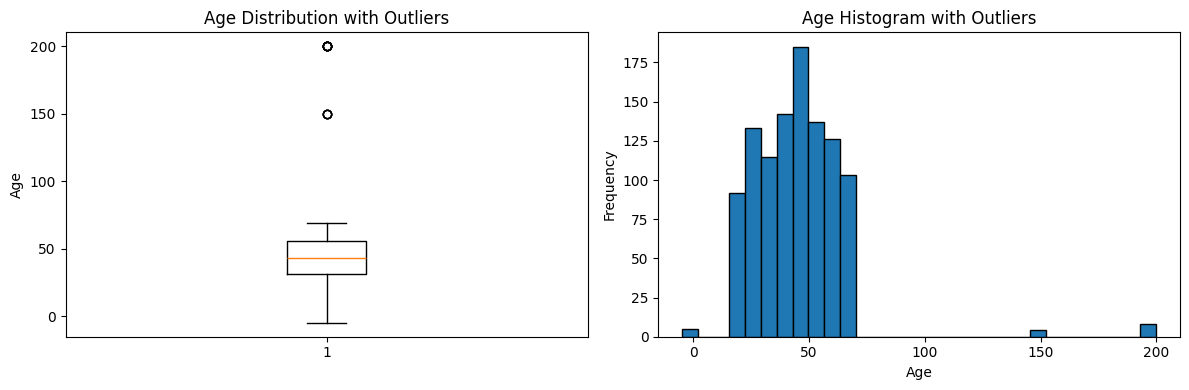

In [107]:
# Z-score method
z_scores = np.abs(stats.zscore(df['Age']))
age_outliers = df[z_scores > 3]

print(f"Found {len(age_outliers)} age outliers using Z-score method")
print("Sample age outliers:")
print(age_outliers[['Name', 'Age']].head())

# Visualize before treatment
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Age Distribution with Outliers')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Histogram with Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Cap Age Outliers (Winsorizing)

Age after capping: 18.0 to 80.0


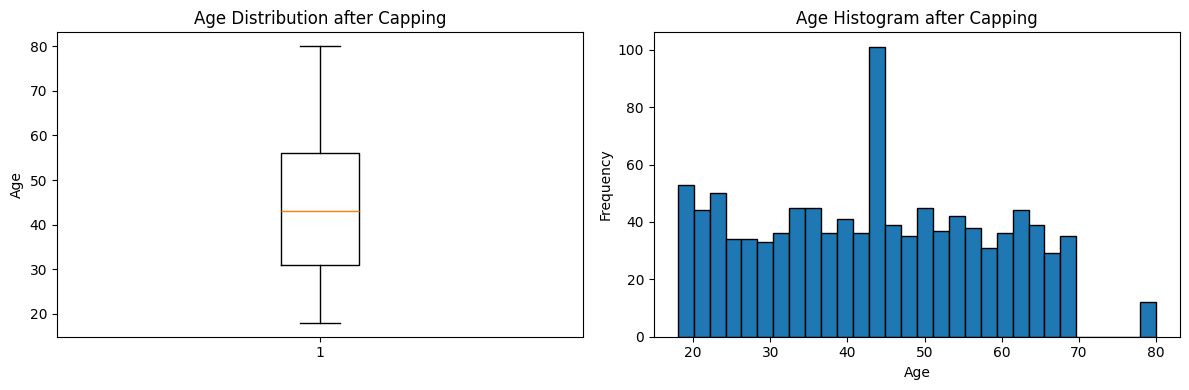

In [108]:
# Cap age between 18 and 80
df['Age'] = df['Age'].clip(lower=18, upper=80)

print(f"Age after capping: {df['Age'].min()} to {df['Age'].max()}")

# Visualize after treatment
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Age Distribution after Capping')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Histogram after Capping')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Detect Outliers - Income (IQR Method)

Found 0 income outliers using IQR method
IQR bounds: -78070.625 to 289048.375


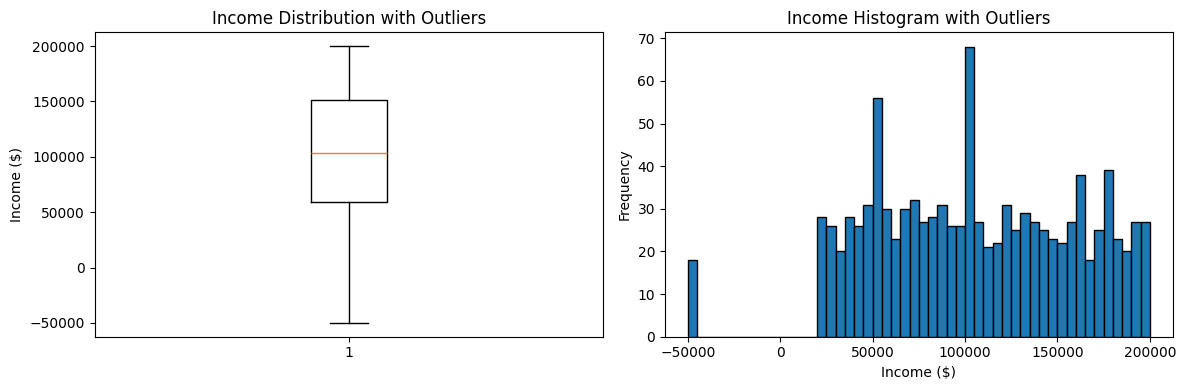

In [109]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

income_outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Found {len(income_outliers)} income outliers using IQR method")
print(f"IQR bounds: {lower_bound} to {upper_bound}")

# Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Income'])
plt.title('Income Distribution with Outliers')
plt.ylabel('Income ($)')

plt.subplot(1, 2, 2)
plt.hist(df['Income'], bins=50, edgecolor='black')
plt.title('Income Histogram with Outliers')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Cap Income Outliers

Income after capping: $15,000 to $199,961


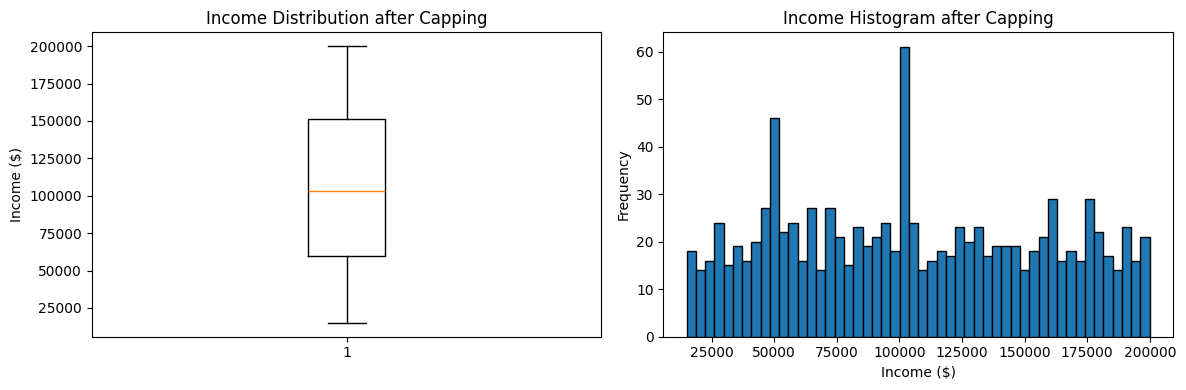

In [110]:
# Remove negative income and cap at reasonable bounds
df['Income'] = df['Income'].clip(lower=15000, upper=250000)

print(f"Income after capping: ${df['Income'].min():,.0f} to ${df['Income'].max():,.0f}")

# Visualize after treatment
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Income'])
plt.title('Income Distribution after Capping')
plt.ylabel('Income ($)')

plt.subplot(1, 2, 2)
plt.hist(df['Income'], bins=50, edgecolor='black')
plt.title('Income Histogram after Capping')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Transform SpendAmount (Log Transformation)

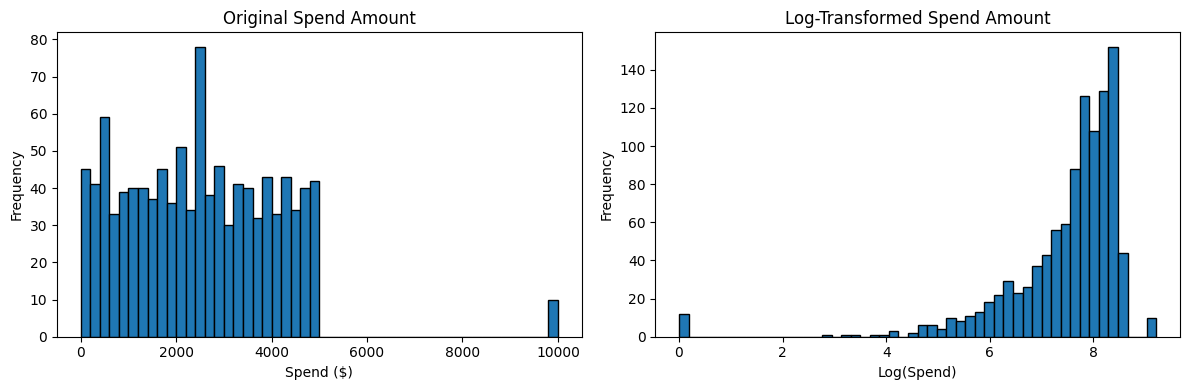

In [111]:
# Remove negative and zero values first
df['SpendAmount'] = df['SpendAmount'].clip(lower=1, upper=10000)

# Create log-transformed version for analysis
df['SpendAmount_Log'] = np.log(df['SpendAmount'])

# Visualize transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['SpendAmount'], bins=50, edgecolor='black')
plt.title('Original Spend Amount')
plt.xlabel('Spend ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['SpendAmount_Log'], bins=50, edgecolor='black')
plt.title('Log-Transformed Spend Amount')
plt.xlabel('Log(Spend)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##STANDARDIZING AND NORMALIZING DATA
##Data Standardization and Normalization
Apply scaling techniques and standardize formats across the dataset.

Min-Max Normalization (0-1 Scale)

Normalized columns created:
    Age  Age_Normalized    Income  Income_Normalized
0  43.0        0.403226  103308.0           0.477441
1  56.0        0.612903  157337.0           0.769551
2  39.0        0.338710  150608.0           0.733171
3  45.0        0.435484  140174.0           0.676759
4  53.0        0.564516  183678.0           0.911965


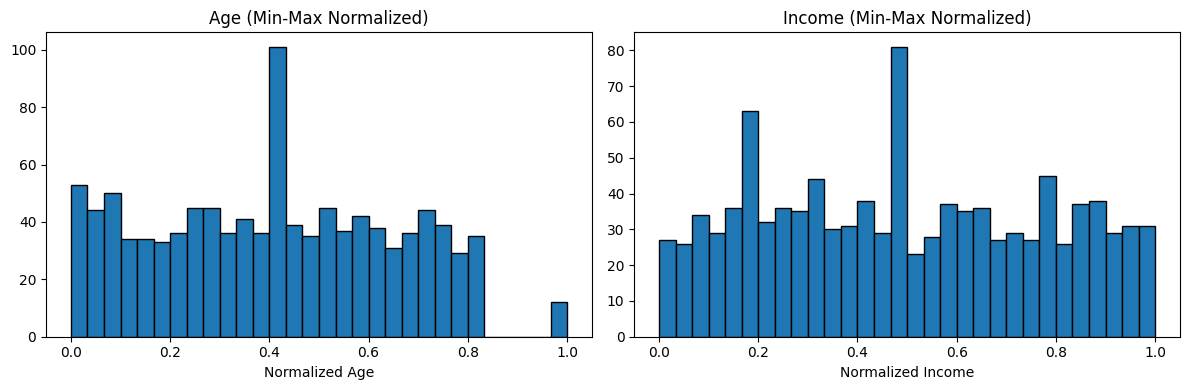

In [112]:
# Normalize Age and Income to 0-1 scale
scaler_minmax = MinMaxScaler()

df['Age_Normalized'] = scaler_minmax.fit_transform(df[['Age']])
df['Income_Normalized'] = scaler_minmax.fit_transform(df[['Income']])

print("Normalized columns created:")
print(df[['Age', 'Age_Normalized', 'Income', 'Income_Normalized']].head())

# Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Age_Normalized'], bins=30, edgecolor='black')
plt.title('Age (Min-Max Normalized)')
plt.xlabel('Normalized Age')

plt.subplot(1, 2, 2)
plt.hist(df['Income_Normalized'], bins=30, edgecolor='black')
plt.title('Income (Min-Max Normalized)')
plt.xlabel('Normalized Income')
plt.tight_layout()
plt.show()


Z-Score Standardization

Standardized spend amount statistics:
Mean: -0.0000
Std: 1.0005


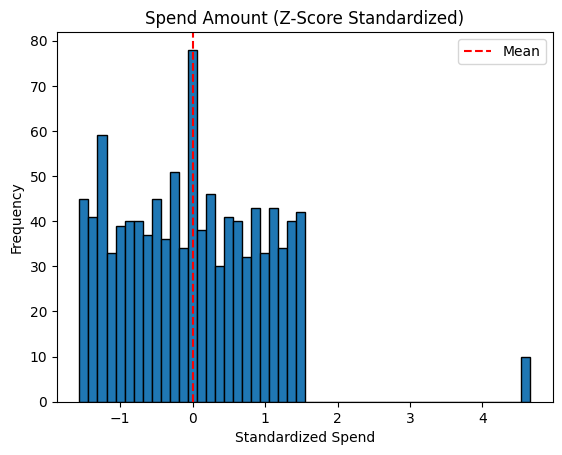

In [113]:
# Standardize SpendAmount using Z-score
scaler_standard = StandardScaler()

df['SpendAmount_Standardized'] = scaler_standard.fit_transform(df[['SpendAmount']])

print("Standardized spend amount statistics:")
print(f"Mean: {df['SpendAmount_Standardized'].mean():.4f}")
print(f"Std: {df['SpendAmount_Standardized'].std():.4f}")

# Visualize
plt.hist(df['SpendAmount_Standardized'], bins=50, edgecolor='black')
plt.title('Spend Amount (Z-Score Standardized)')
plt.xlabel('Standardized Spend')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()


Date Format Standardization

In [114]:
# Ensure all dates in consistent format
df['SignupDate_Formatted'] = df['SignupDate'].dt.strftime('%Y-%m-%d')
df['LastPurchase_Formatted'] = df['LastPurchase'].dt.strftime('%Y-%m-%d')

print("Sample formatted dates:")
print(df[['SignupDate_Formatted', 'LastPurchase_Formatted']].head())


Sample formatted dates:
  SignupDate_Formatted LastPurchase_Formatted
0           2022-02-17             2021-10-28
1           2020-11-26             2019-03-29
2           2023-06-21             2022-02-28
3           2020-02-04             2022-01-09
4           2023-06-29             2023-09-22


Text Cleaning - Lowercasing and Whitespace

In [115]:
# Already done for most columns, but ensure Email is clean
df['Email_Clean'] = df['Email'].str.strip().str.lower().str.replace(r'\s+', '', regex=True)

print("Sample cleaned emails:")
print(df[['Email', 'Email_Clean']].head())


Sample cleaned emails:
               Email        Email_Clean
0  unknown@email.com  unknown@email.com
1    user1@gmail.com    user1@gmail.com
2    user2@yahoo.com    user2@yahoo.com
3    user3@gmail.com    user3@gmail.com
4    user4@yahoo.com    user4@yahoo.com


##FIXING INACCURATE DATA
##Validate and Fix Inaccurate Data
Check for logical inconsistencies and validate against patterns.


Logical Validation - Date Consistency

In [116]:
# Check if LastPurchase is before SignupDate (logical error)
invalid_dates = df[df['LastPurchase'] < df['SignupDate']]

print(f"Found {len(invalid_dates)} records where LastPurchase is before SignupDate")

# Fix: Set LastPurchase to SignupDate for these cases
df.loc[df['LastPurchase'] < df['SignupDate'], 'LastPurchase'] = df['SignupDate']

print("Fixed logical date inconsistencies")


Found 592 records where LastPurchase is before SignupDate
Fixed logical date inconsistencies


Email Validation Using Regex

In [117]:
# Validate email format
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

df['Email_Valid'] = df['Email_Clean'].apply(lambda x: bool(re.match(email_pattern, str(x))))

invalid_emails = df[~df['Email_Valid']]
print(f"Found {len(invalid_emails)} invalid email addresses")

# Replace invalid emails with placeholder
df.loc[~df['Email_Valid'], 'Email_Clean'] = 'invalid@example.com'

print("Sample validation results:")
print(df[['Email', 'Email_Clean', 'Email_Valid']].head(10))


Found 34 invalid email addresses
Sample validation results:
               Email        Email_Clean  Email_Valid
0  unknown@email.com  unknown@email.com         True
1    user1@gmail.com    user1@gmail.com         True
2    user2@yahoo.com    user2@yahoo.com         True
3    user3@gmail.com    user3@gmail.com         True
4    user4@yahoo.com    user4@yahoo.com         True
5    user5@gmail.com    user5@gmail.com         True
6    user6@yahoo.com    user6@yahoo.com         True
7    user7@gmail.com    user7@gmail.com         True
8    user8@yahoo.com    user8@yahoo.com         True
9    user9@gmail.com    user9@gmail.com         True


Phone Number Validation and Standardization

In [118]:
# Extract digits and standardize to XXX-XXX-XXXX format
def standardize_phone(phone):
    if pd.isna(phone):
        return '000-000-0000'
    digits = re.sub(r'\D', '', str(phone))
    if len(digits) == 10:
        return f"{digits[:3]}-{digits[3:6]}-{digits[6:]}"
    elif len(digits) == 11 and digits[0] == '1':
        return f"{digits[1:4]}-{digits[4:7]}-{digits[7:]}"
    else:
        return '000-000-0000'

df['PhoneNumber_Standardized'] = df['PhoneNumber'].apply(standardize_phone)

print("Sample standardized phone numbers:")
print(df[['PhoneNumber', 'PhoneNumber_Standardized']].head(10))


Sample standardized phone numbers:
       PhoneNumber PhoneNumber_Standardized
0     000-000-0000             000-000-0000
1  +1-330-761-1769             330-761-1769
2  +1-366-373-9792             366-373-9792
3       6429456860             642-945-6860
4   (692) 140-6276             692-140-6276
5  +1-618-388-6892             618-388-6892
6   (968) 104-8385             968-104-8385
7  +1-933-584-8574             933-584-8574
8  +1-997-430-2663             997-430-2663
9  +1-433-783-1663             433-783-1663


Range Validation

In [119]:
# Validate that all values are within expected ranges
validation_results = {
    'Age in valid range (18-80)': df['Age'].between(18, 80).all(),
    'Income in valid range (15k-250k)': df['Income'].between(15000, 250000).all(),
    'SpendAmount positive': (df['SpendAmount'] > 0).all(),
}

print("Validation results:")
for check, result in validation_results.items():
    print(f"  {check}: {'PASS' if result else 'FAIL'}")


Validation results:
  Age in valid range (18-80): PASS
  Income in valid range (15k-250k): PASS
  SpendAmount positive: PASS


##ADDRESSING DUPLICATE DATA
## Duplicate Detection and Removal
Identify exact and fuzzy duplicates, then handle appropriately.

Exact Duplicate Detection

In [120]:
# Find exact duplicates
exact_duplicates = df.duplicated()
print(f"Found {exact_duplicates.sum()} exact duplicate rows")

# Show sample duplicates
duplicate_rows = df[df.duplicated(keep=False)].sort_values('CustomerID')
print("\nSample duplicate rows:")
print(duplicate_rows.head(10))


Found 50 exact duplicate rows

Sample duplicate rows:
      CustomerID            Name              Email   Age    Income     City  \
7              8    David Wilson    user7@gmail.com  56.0  141626.0  Houston   
1043           8    David Wilson    user7@gmail.com  56.0  141626.0  Houston   
1049          19  Charlie Wilson   user18@yahoo.com  23.0  198274.0  Houston   
18            19  Charlie Wilson   user18@yahoo.com  23.0  198274.0  Houston   
40            41      Bob  Moore  unknown@email.com  43.0   15000.0  Chicago   
1012          41      Bob  Moore  unknown@email.com  43.0   15000.0  Chicago   
1010          67     David Davis   user66@yahoo.com  25.0  130904.0  Chicago   
66            67     David Davis   user66@yahoo.com  25.0  130904.0  Chicago   
76            77      Emma Moore   user76@yahoo.com  38.0   31344.0  Chicago   
1028          77      Emma Moore   user76@yahoo.com  38.0   31344.0  Chicago   

     Country SignupDate LastPurchase ProductCategory  ...      Ph

Duplicate CustomerID Detection

In [121]:
# Find duplicate CustomerIDs
duplicate_ids = df[df.duplicated(subset='CustomerID', keep=False)]
print(f"Found {len(duplicate_ids)} rows with duplicate CustomerIDs")

# Show duplicates
if len(duplicate_ids) > 0:
    print("\nSample duplicate CustomerIDs:")
    print(duplicate_ids[['CustomerID', 'Name', 'Email_Clean']].head(10))


Found 97 rows with duplicate CustomerIDs

Sample duplicate CustomerIDs:
     CustomerID            Name          Email_Clean
7             8    David Wilson      user7@gmail.com
18           19  Charlie Wilson     user18@yahoo.com
40           41      Bob  Moore    unknown@email.com
66           67     David Davis     user66@yahoo.com
76           77      Emma Moore     user76@yahoo.com
88           89  Charlie Wilson     user88@yahoo.com
97           98      John Davis     user97@gmail.com
98           99       Eve Smith     user98@yahoo.com
105         106     David Davis  invalid@example.com
111         112       Eve Moore    user111@gmail.com


Handle Duplicate IDs (Keep First)

In [122]:
initial_count = len(df)
df = df.drop_duplicates(subset='CustomerID', keep='first')
print(f"Removed {initial_count - len(df)} rows with duplicate CustomerIDs")
print(f"Final row count: {len(df)}")


Removed 50 rows with duplicate CustomerIDs
Final row count: 1000


Fuzzy Duplicate Detection (Names)

In [123]:
# Find similar names (simple approach - same first 3 characters)
df['Name_Key'] = df['Name'].str.lower().str[:3]
fuzzy_duplicates = df[df.duplicated(subset='Name_Key', keep=False)].sort_values('Name_Key')

print(f"Potential fuzzy duplicates (same first 3 chars): {len(fuzzy_duplicates)}")
print("\nSample potential fuzzy matches:")
print(fuzzy_duplicates[['CustomerID', 'Name', 'Name_Key']].head(15))


Potential fuzzy duplicates (same first 3 chars): 1000

Sample potential fuzzy matches:
     CustomerID           Name Name_Key
734         735      Alice Doe      ali
646         647  Alice Johnson      ali
803         804    Alice Smith      ali
706         707   Alice Wilson      ali
212         213    Alice Davis      ali
437         438    Alice Davis      ali
478         479    Alice Smith      ali
208         209    Alice Smith      ali
412         413    Alice Moore      ali
73           74  Alice Johnson      ali
395         396   Alice  Brown      ali
850         851      Alice Doe      ali
281         282      Alice Doe      ali
622         623    Alice Moore      ali
202         203   Alice  Brown      ali


##DATA TRANSFORMATION AND ENRICHMENT
##Encoding Categorical Variables
Convert categorical data into numerical formats suitable for machine learning.

Label Encoding

In [124]:
# Label encode AccountStatus
le_status = LabelEncoder()
df['AccountStatus_Encoded'] = le_status.fit_transform(df['AccountStatus'])

print("Label encoding mapping for AccountStatus:")
for i, status in enumerate(le_status.classes_):
    print(f"  {status}: {i}")

print("\nSample encoded values:")
print(df[['AccountStatus', 'AccountStatus_Encoded']].head())


Label encoding mapping for AccountStatus:
  Active: 0
  Inactive: 1
  Suspended: 2

Sample encoded values:
  AccountStatus  AccountStatus_Encoded
0        Active                      0
1        Active                      0
2      Inactive                      1
3      Inactive                      1
4        Active                      0


One-Hot Encoding

In [125]:
# One-hot encode ProductCategory
category_dummies = pd.get_dummies(df['ProductCategory'], prefix='Category')
df = pd.concat([df, category_dummies], axis=1)

print("One-hot encoded columns created:")
print(category_dummies.columns.tolist())

print("\nSample one-hot encoded data:")
print(df[['ProductCategory'] + category_dummies.columns.tolist()].head())


One-hot encoded columns created:
['Category_Books', 'Category_Clothing', 'Category_Electronics', 'Category_Home & Garden']

Sample one-hot encoded data:
  ProductCategory  Category_Books  Category_Clothing  Category_Electronics  \
0        Clothing           False               True                 False   
1        Clothing           False               True                 False   
2        Clothing           False               True                 False   
3        Clothing           False               True                 False   
4   Home & Garden           False              False                 False   

   Category_Home & Garden  
0                   False  
1                   False  
2                   False  
3                   False  
4                    True  


 One-Hot Encoding - Country

In [126]:
# One-hot encode Country
country_dummies = pd.get_dummies(df['Country'], prefix='Country')
df = pd.concat([df, country_dummies], axis=1)

print("Country one-hot encoded columns:")
print(country_dummies.columns.tolist())


Country one-hot encoded columns:
['Country_Canada', 'Country_India', 'Country_UK', 'Country_USA']


##Binning and Discretization
Group continuous variables into categorical bins for analysis.

Age group distribution:
AgeGroup
18-25    159
26-35    169
36-45    243
46-55    174
56+      255
Name: count, dtype: int64


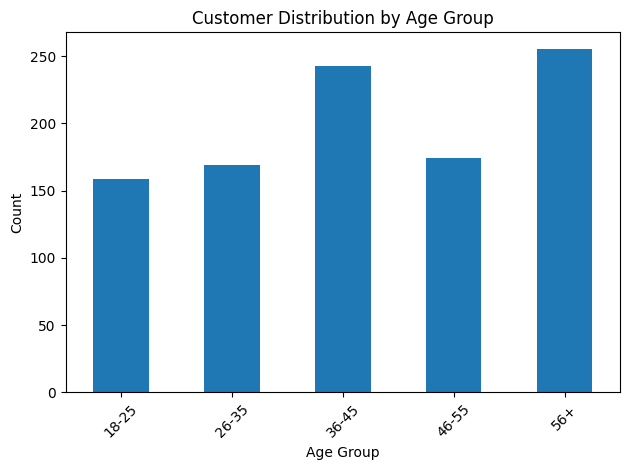

In [127]:
# Create age groups
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

print("Age group distribution:")
print(df['AgeGroup'].value_counts().sort_index())

# Visualize
df['AgeGroup'].value_counts().sort_index().plot(kind='bar')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Income Binning

Income category distribution:
IncomeCategory
Low            116
Medium-Low     187
Medium         159
Medium-High    286
High           252
Name: count, dtype: int64


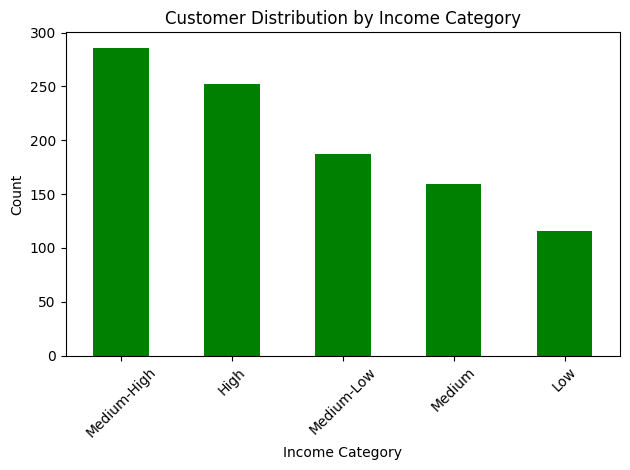

In [128]:
# Create income brackets
income_bins = [0, 40000, 70000, 100000, 150000, 300000]
income_labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

df['IncomeCategory'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

print("Income category distribution:")
print(df['IncomeCategory'].value_counts().sort_index())

# Visualize
df['IncomeCategory'].value_counts().plot(kind='bar', color='green')
plt.title('Customer Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Spend Amount Binning

In [129]:
# Create spend categories
spend_bins = [0, 100, 500, 1000, 2000, 11000]
spend_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['SpendCategory'] = pd.cut(df['SpendAmount'], bins=spend_bins, labels=spend_labels)

print("Spend category distribution:")
print(df['SpendCategory'].value_counts().sort_index())


Spend category distribution:
SpendCategory
Very Low      22
Low           88
Medium        97
High         192
Very High    601
Name: count, dtype: int64


##Feature Engineering
Create new meaningful features from existing columns.

Calculate Customer Tenure

Tenure statistics:
        TenureDays  TenureYears
count  1000.000000  1000.000000
mean   1355.543000     3.711274
std     399.616493     1.094090
min     507.000000     1.388090
25%    1040.000000     2.847365
50%    1342.000000     3.674196
75%    1664.000000     4.555784
max    2120.000000     5.804244


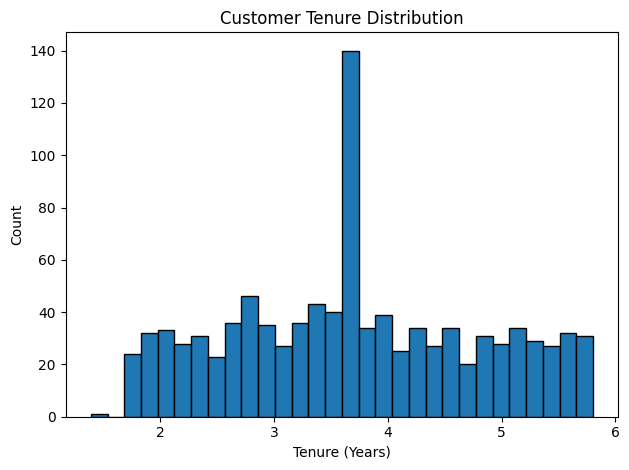

In [130]:
# Calculate days since signup
reference_date = pd.Timestamp('2025-10-21')
df['TenureDays'] = (reference_date - df['SignupDate']).dt.days
df['TenureYears'] = df['TenureDays'] / 365.25

print("Tenure statistics:")
print(df[['TenureDays', 'TenureYears']].describe())

# Visualize
plt.hist(df['TenureYears'], bins=30, edgecolor='black')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Days Since Last Purchase

Days since last purchase statistics:
count    1000.000000
mean     1121.148000
std       381.861627
min       486.000000
25%       800.000000
50%      1086.000000
75%      1352.000000
max      2094.000000
Name: DaysSinceLastPurchase, dtype: float64


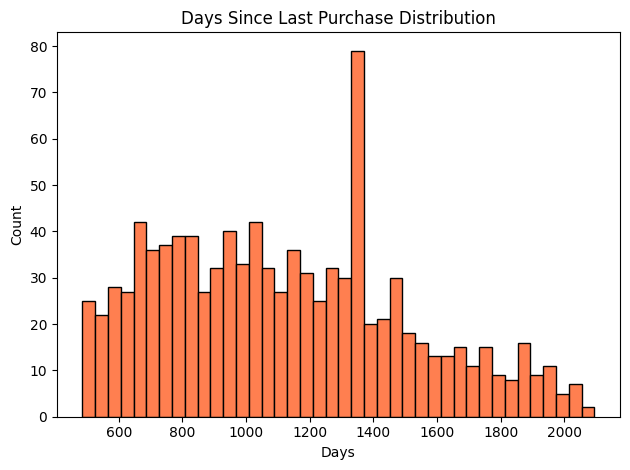

In [131]:
df['DaysSinceLastPurchase'] = (reference_date - df['LastPurchase']).dt.days

print("Days since last purchase statistics:")
print(df['DaysSinceLastPurchase'].describe())

# Visualize
plt.hist(df['DaysSinceLastPurchase'], bins=40, edgecolor='black', color='coral')
plt.title('Days Since Last Purchase Distribution')
plt.xlabel('Days')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


 Create Customer Value Score

Customer value score statistics:
count    1000.000000
mean        0.402956
std         0.156320
min         0.047575
25%         0.274739
50%         0.405524
75%         0.524199
max         0.900333
Name: CustomerValueScore, dtype: float64


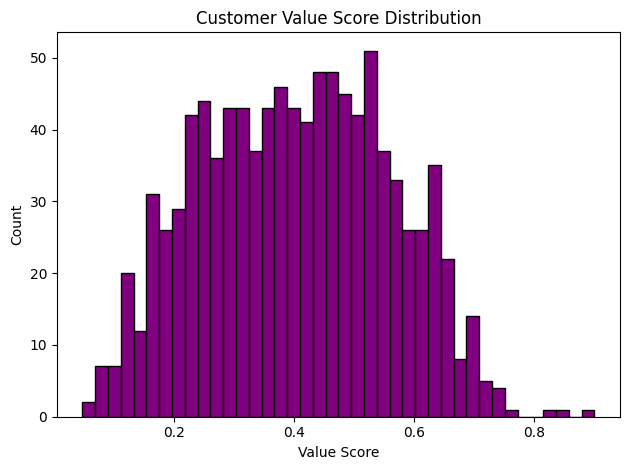

In [132]:
# Composite score: normalized income * normalized spend
df['CustomerValueScore'] = (df['Income_Normalized'] * 0.5 +
                             df['Age_Normalized'] * 0.2 +
                             (df['SpendAmount'] / df['SpendAmount'].max()) * 0.3)

print("Customer value score statistics:")
print(df['CustomerValueScore'].describe())

# Visualize
plt.hist(df['CustomerValueScore'], bins=40, edgecolor='black', color='purple')
plt.title('Customer Value Score Distribution')
plt.xlabel('Value Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Income to Spend Ratio

In [133]:
df['IncomeToSpendRatio'] = df['Income'] / (df['SpendAmount'] + 1)  # +1 to avoid division by zero

print("Income-to-Spend ratio statistics:")
print(df['IncomeToSpendRatio'].describe())


Income-to-Spend ratio statistics:
count     1000.000000
mean       640.933309
std       5553.861066
min          2.723028
25%         23.179008
50%         44.146227
75%         85.647389
max      92054.500000
Name: IncomeToSpendRatio, dtype: float64


Extract Email Domain

In [134]:
df['EmailDomain'] = df['Email_Clean'].str.split('@').str[1]

print("Email domain distribution:")
print(df['EmailDomain'].value_counts().head(10))


Email domain distribution:
EmailDomain
gmail.com      467
yahoo.com      400
email.com      100
example.com     33
Name: count, dtype: int64


Create Recency, Frequency Indicators

In [135]:
# Recency: Active if purchased in last 180 days
df['RecentCustomer'] = (df['DaysSinceLastPurchase'] <= 180).astype(int)

print(f"Recent customers (last 180 days): {df['RecentCustomer'].sum()}")
print(f"Inactive customers: {(df['RecentCustomer'] == 0).sum()}")


Recent customers (last 180 days): 0
Inactive customers: 1000


##EXPLORATORY DATA ANALYSIS (CLEANED DATA)
##Comprehensive EDA on Cleaned Data
Perform detailed exploratory analysis on the fully cleaned dataset.

Final Dataset Overview

In [136]:
print("="*60)
print("CLEANED DATASET SUMMARY")
print("="*60)
print(f"\nTotal Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nMissing Values:")
print(df.isnull().sum().sum())
print("\n" + "="*60)


CLEANED DATASET SUMMARY

Total Records: 1000
Total Features: 42

Data Types:
object            13
float64           10
bool               9
int64              5
datetime64[ns]     2
category           1
category           1
category           1
Name: count, dtype: int64

Missing Values:
0



 Numerical Features Summary

In [137]:
numerical_cols = ['Age', 'Income', 'SpendAmount', 'TenureDays', 'DaysSinceLastPurchase']
print("Numerical features summary statistics:")
print(df[numerical_cols].describe())


Numerical features summary statistics:
               Age         Income   SpendAmount   TenureDays  \
count  1000.000000    1000.000000   1000.000000  1000.000000   
mean     43.527000  105766.416000   2508.158850  1355.543000   
std      15.084788   52095.521406   1618.777553   399.616493   
min      18.000000   15000.000000      1.000000   507.000000   
25%      31.750000   59408.500000   1240.532500  1040.000000   
50%      43.000000  103308.000000   2441.190000  1342.000000   
75%      56.000000  150800.500000   3653.855000  1664.000000   
max      80.000000  199961.000000  10000.000000  2120.000000   

       DaysSinceLastPurchase  
count            1000.000000  
mean             1121.148000  
std               381.861627  
min               486.000000  
25%               800.000000  
50%              1086.000000  
75%              1352.000000  
max              2094.000000  


Categorical Features Distribution

In [138]:
categorical_cols = ['City', 'Country', 'ProductCategory', 'AccountStatus',
                    'AgeGroup', 'IncomeCategory', 'SpendCategory']

print("Categorical features distributions:\n")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())
    print("-" * 40)


Categorical features distributions:


City:
City
Chicago        275
New York       267
Los Angeles    267
Houston        191
Name: count, dtype: int64
----------------------------------------

Country:
Country
USA       408
India     212
UK        190
Canada    190
Name: count, dtype: int64
----------------------------------------

ProductCategory:
ProductCategory
Clothing         293
Electronics      283
Books            215
Home & Garden    209
Name: count, dtype: int64
----------------------------------------

AccountStatus:
AccountStatus
Active       525
Inactive     309
Suspended    166
Name: count, dtype: int64
----------------------------------------

AgeGroup:
AgeGroup
56+      255
36-45    243
46-55    174
26-35    169
18-25    159
Name: count, dtype: int64
----------------------------------------

IncomeCategory:
IncomeCategory
Medium-High    286
High           252
Medium-Low     187
Medium         159
Low            116
Name: count, dtype: int64
-----------------------------

Correlation Analysis

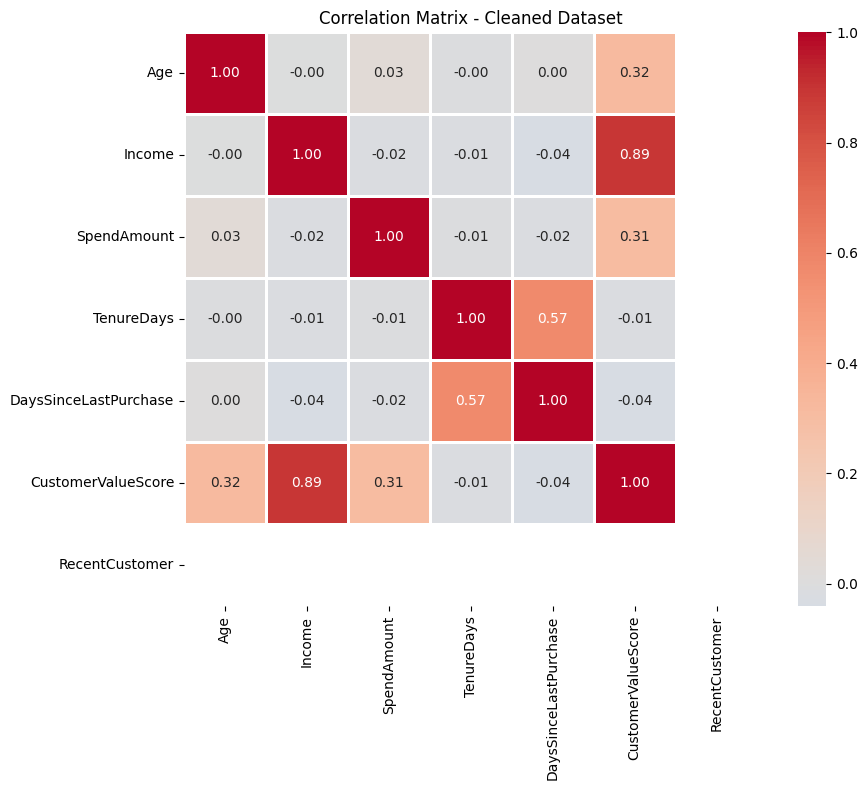

In [139]:
# Select numerical columns for correlation
corr_columns = ['Age', 'Income', 'SpendAmount', 'TenureDays',
                'DaysSinceLastPurchase', 'CustomerValueScore', 'RecentCustomer']

correlation_matrix = df[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - Cleaned Dataset')
plt.tight_layout()
plt.show()


Age vs Income Scatter Plot

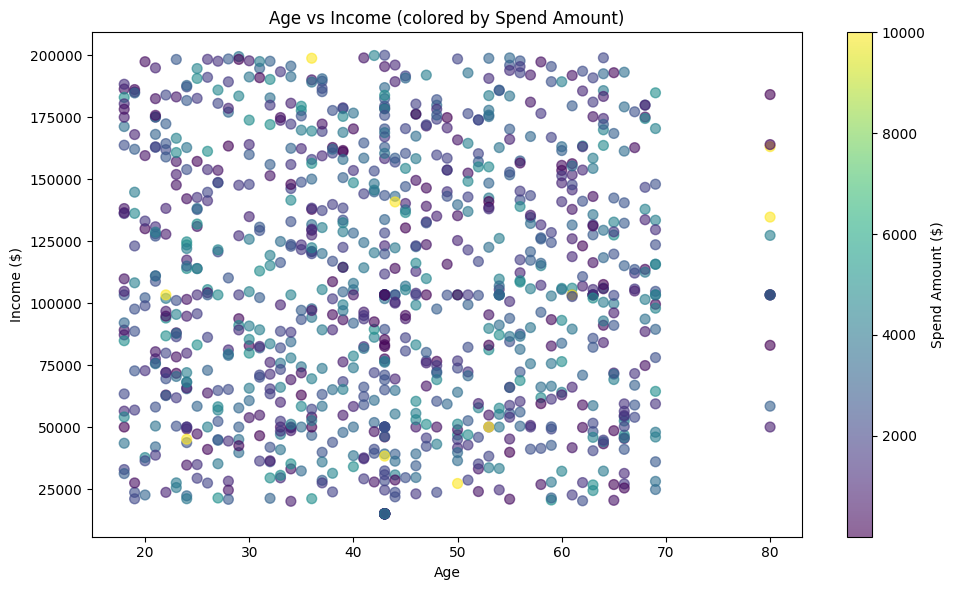

In [140]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['Income'], c=df['SpendAmount'],
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Spend Amount ($)')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Age vs Income (colored by Spend Amount)')
plt.tight_layout()
plt.show()


Product Category Analysis

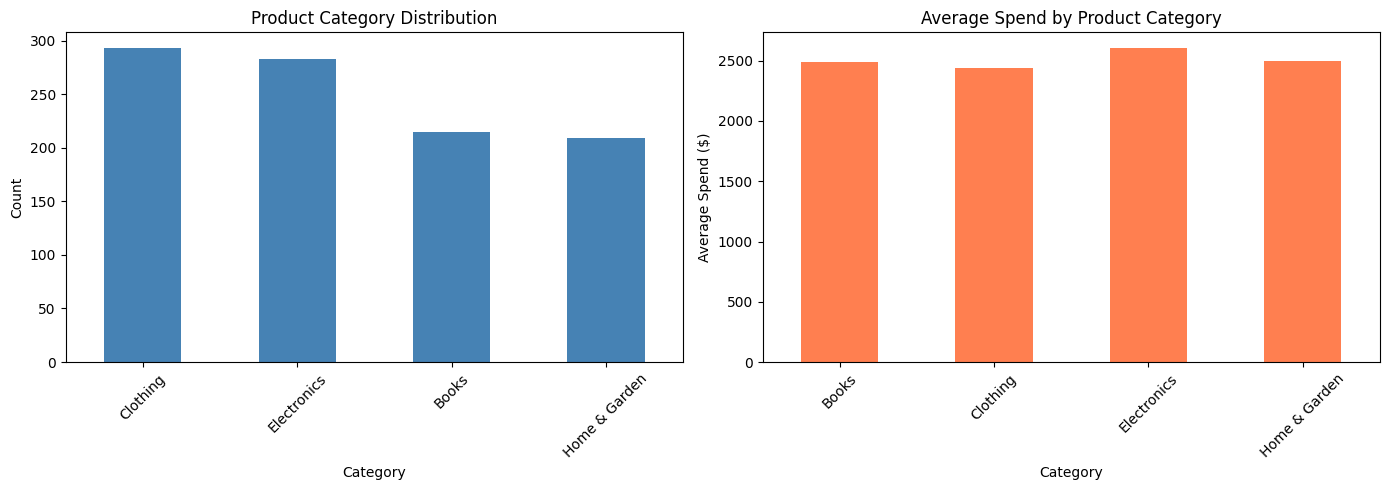

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Category distribution
df['ProductCategory'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Product Category Distribution')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Average spend by category
df.groupby('ProductCategory')['SpendAmount'].mean().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Average Spend by Product Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average Spend ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Income Distribution by Country

<Figure size 1200x600 with 0 Axes>

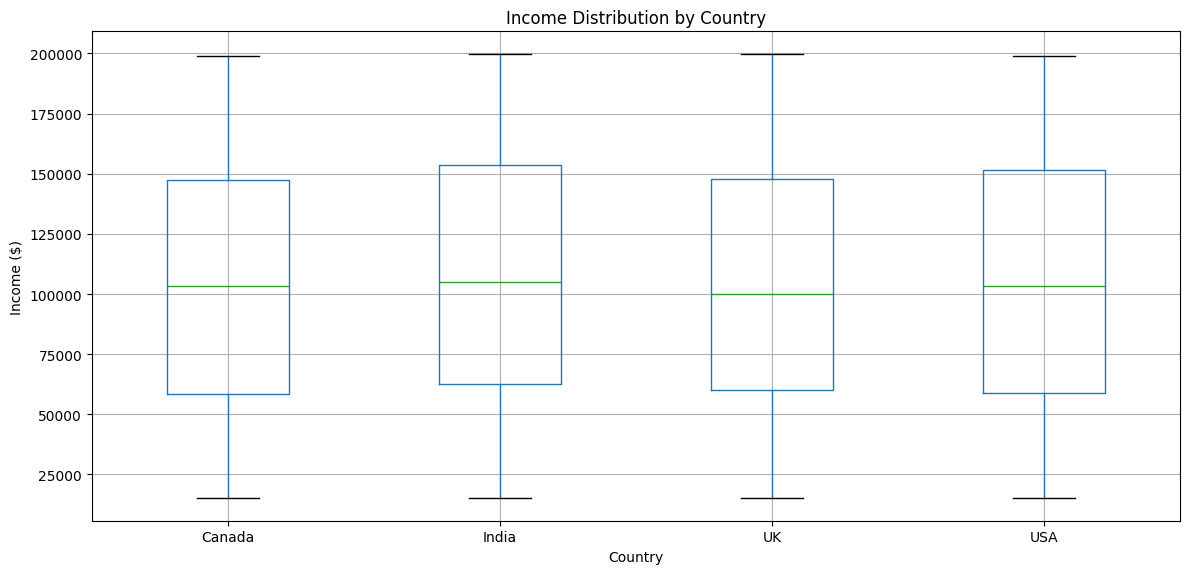

In [142]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Income', by='Country', figsize=(12, 6))
plt.suptitle('')
plt.title('Income Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Income ($)')
plt.tight_layout()
plt.show()


Customer Segmentation Visualization

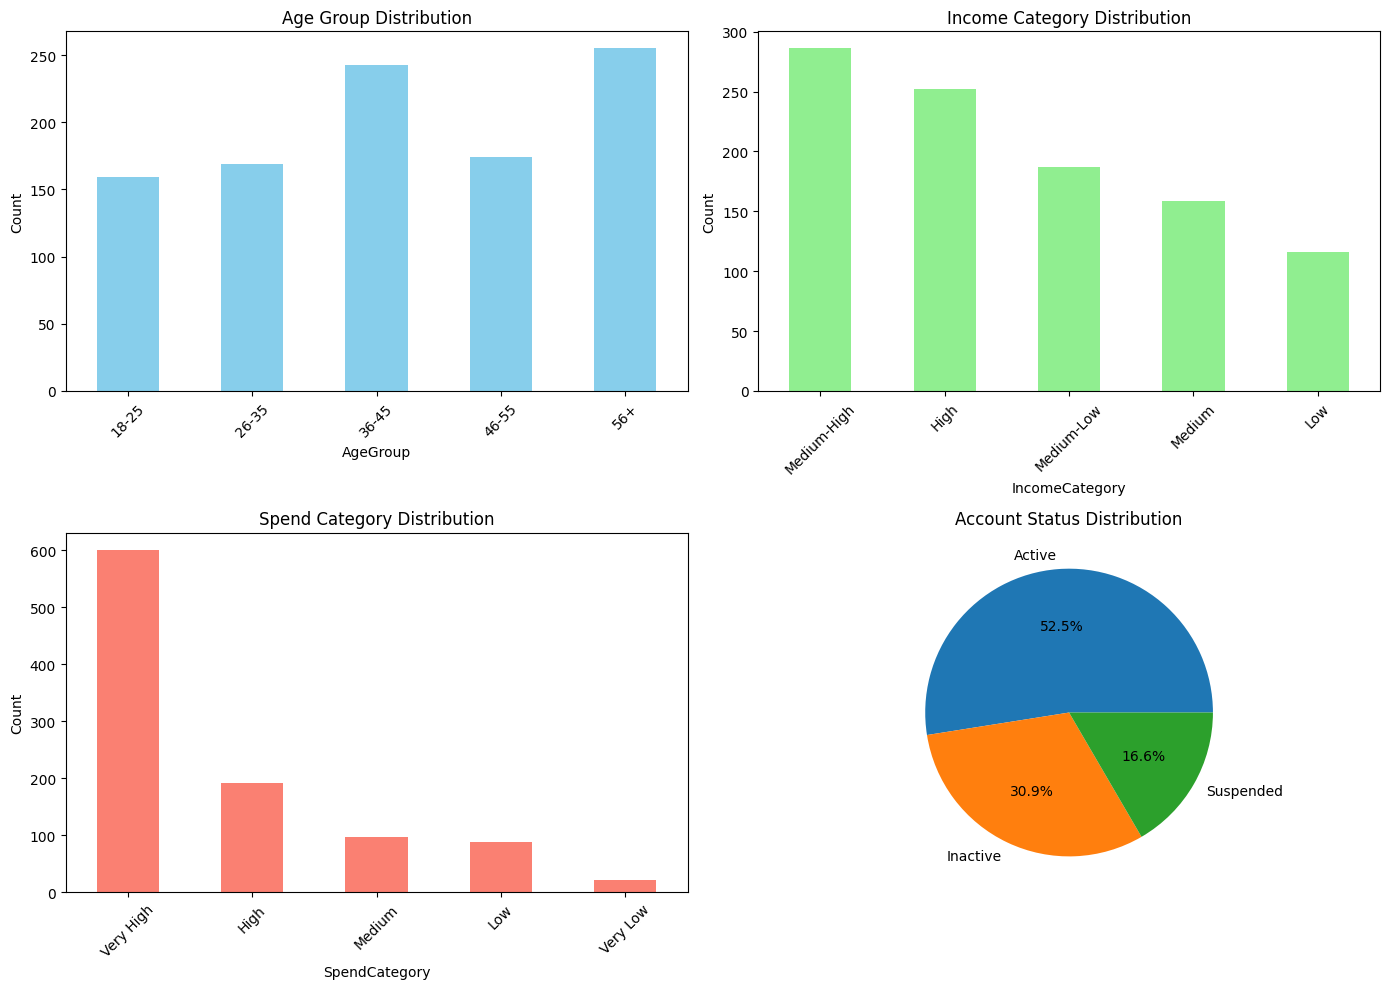

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age group distribution
df['AgeGroup'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Group Distribution')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Income category distribution
df['IncomeCategory'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Income Category Distribution')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Spend category distribution
df['SpendCategory'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Spend Category Distribution')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Account status distribution
df['AccountStatus'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Account Status Distribution')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


Time Series Analysis

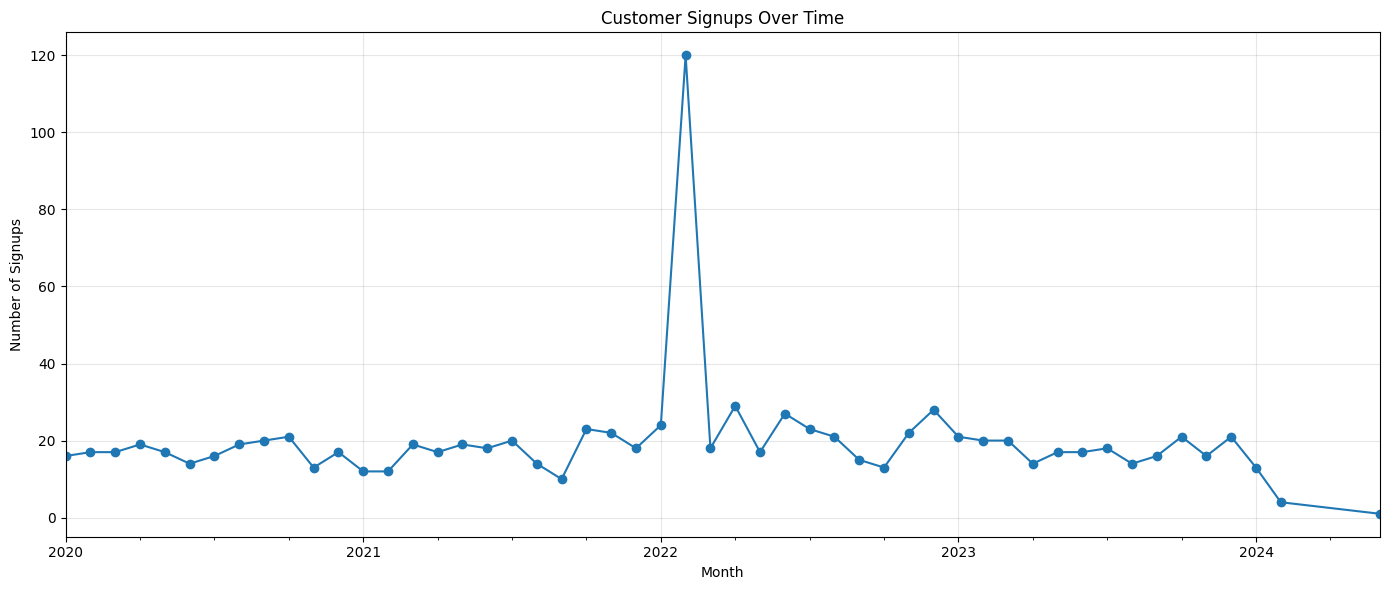

In [144]:
# Signups over time
df_sorted = df.sort_values('SignupDate')
df_sorted['SignupMonth'] = df_sorted['SignupDate'].dt.to_period('M')
monthly_signups = df_sorted.groupby('SignupMonth').size()

plt.figure(figsize=(14, 6))
monthly_signups.plot(kind='line', marker='o')
plt.title('Customer Signups Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Customer Value Analysis

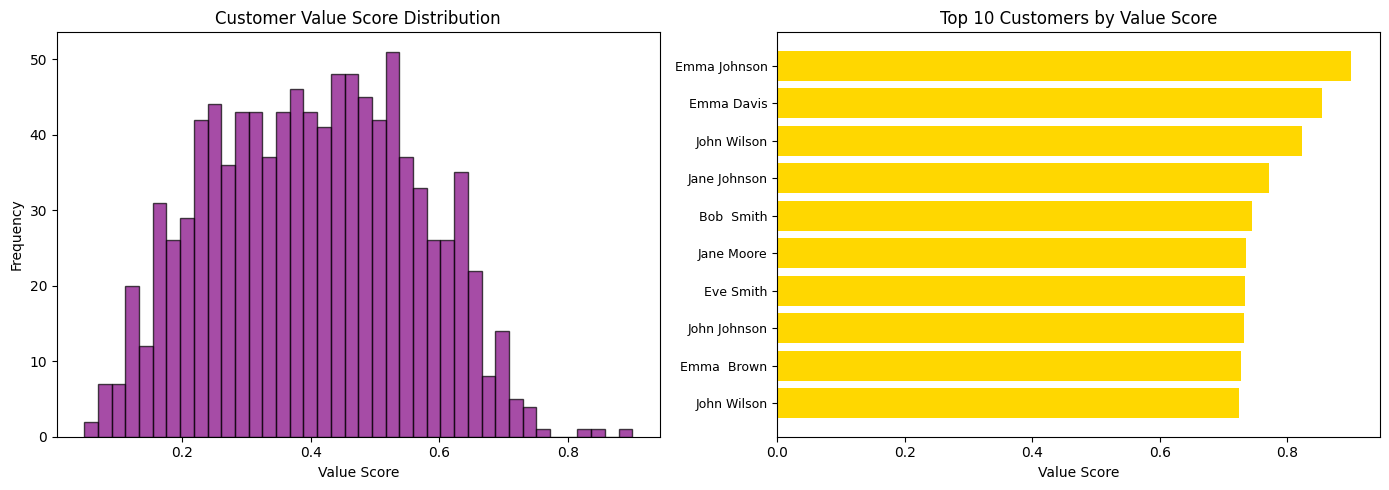

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Value score distribution
axes[0].hist(df['CustomerValueScore'], bins=40, edgecolor='black', color='purple', alpha=0.7)
axes[0].set_title('Customer Value Score Distribution')
axes[0].set_xlabel('Value Score')
axes[0].set_ylabel('Frequency')

# Top customers by value score
top_customers = df.nlargest(10, 'CustomerValueScore')[['Name', 'CustomerValueScore', 'Income', 'SpendAmount']]
axes[1].barh(range(len(top_customers)), top_customers['CustomerValueScore'], color='gold')
axes[1].set_yticks(range(len(top_customers)))
axes[1].set_yticklabels(top_customers['Name'], fontsize=9)
axes[1].set_xlabel('Value Score')
axes[1].set_title('Top 10 Customers by Value Score')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


Export Cleaned Dataset

In [146]:
# Select key columns for export
export_columns = ['CustomerID', 'Name', 'Email_Clean', 'Age', 'AgeGroup',
                  'Income', 'IncomeCategory', 'City', 'Country',
                  'SignupDate', 'LastPurchase', 'ProductCategory',
                  'SpendAmount', 'SpendCategory', 'AccountStatus',
                  'PhoneNumber_Standardized', 'TenureDays', 'TenureYears',
                  'DaysSinceLastPurchase', 'CustomerValueScore', 'RecentCustomer']

df_export = df[export_columns].copy()

# Save to CSV
df_export.to_csv('cleaned_customer_data.csv', index=False)

print(f"Cleaned dataset exported successfully!")
print(f"Total records: {len(df_export)}")
print(f"Total columns: {len(df_export.columns)}")


Cleaned dataset exported successfully!
Total records: 1000
Total columns: 21


Data Quality Report

In [147]:
print("="*70)
print("DATA QUALITY REPORT - FINAL")
print("="*70)

report = {
    'Total Records (Original)': len(df_raw),
    'Total Records (Cleaned)': len(df),
    'Records Removed': len(df_raw) - len(df),
    'Total Features (Final)': len(df.columns),
    'Missing Values (Final)': df.isnull().sum().sum(),
    'Duplicate Records (Final)': df.duplicated().sum(),
    'Data Types': df.dtypes.value_counts().to_dict(),
}

for key, value in report.items():
    print(f"\n{key}: {value}")

print("\n" + "="*70)
print("\nCleaning Operations Performed:")
operations = [
    "✓ Missing data imputation (statistical and constant)",
    "✓ Duplicate removal (exact and ID-based)",
    "✓ Text standardization (case, whitespace, typos)",
    "✓ Data type corrections",
    "✓ Outlier detection and capping",
    "✓ Date parsing and validation",
    "✓ Logical consistency checks",
    "✓ Email and phone validation",
    "✓ Min-Max and Z-score normalization",
    "✓ Label and one-hot encoding",
    "✓ Binning and discretization",
    "✓ Feature engineering (tenure, value score, etc.)",
    "✓ Comprehensive EDA and visualization"
]

for op in operations:
    print(f"  {op}")

print("\n" + "="*70)


DATA QUALITY REPORT - FINAL

Total Records (Original): 1050

Total Records (Cleaned): 1000

Records Removed: 50

Total Features (Final): 42

Missing Values (Final): 0

Duplicate Records (Final): 0

Data Types: {dtype('O'): 13, dtype('float64'): 10, dtype('bool'): 9, dtype('int64'): 5, dtype('<M8[ns]'): 2, CategoricalDtype(categories=['18-25', '26-35', '36-45', '46-55', '56+'], ordered=True, categories_dtype=object): 1, CategoricalDtype(categories=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'], ordered=True, categories_dtype=object): 1, CategoricalDtype(categories=['Very Low', 'Low', 'Medium', 'High', 'Very High'], ordered=True, categories_dtype=object): 1}


Cleaning Operations Performed:
  ✓ Missing data imputation (statistical and constant)
  ✓ Duplicate removal (exact and ID-based)
  ✓ Text standardization (case, whitespace, typos)
  ✓ Data type corrections
  ✓ Outlier detection and capping
  ✓ Date parsing and validation
  ✓ Logical consistency checks
  ✓ Email and phone va

##Project Conclusion
This comprehensive data cleaning project covered all major cleaning types on a massive synthetic dataset with 1000+ records. Key accomplishments include handling missing data through multiple imputation strategies, correcting structural errors with text standardization and type conversions, managing outliers using statistical methods and transformations, applying normalization and standardization techniques, validating data accuracy through pattern matching and logical checks, removing exact and fuzzy duplicates, and enriching data through encoding, binning, and feature engineering. The cleaned dataset is now ready for machine learning modeling or advanced analytics, with all quality issues systematically addressed.